Code cleaup. Need to 
1. remove repeated sentences due to vtt formatting
2. some words are concatenated together (helloBut--> hello But, swimming in a pool.We--> swimming in a pool. We)

In [1]:
import glob
import json
import regex as re
import os
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.corpus.reader import *
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiwonlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiwonlee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
with open('../channelHolisticInfo.json', 'r') as j:
    channelHolisticInfo = json.loads(j.read())
channelHolisticInfoDf = pd.DataFrame.from_dict(channelHolisticInfo)
channelHolisticInfoDf.head()
len(channelHolisticInfoDf)

56

In [3]:
LIST_OF_CHANNEL_IDS = channelHolisticInfoDf['channelId'].tolist()
LIST_OF_CHANNEL_NAMES = channelHolisticInfoDf['channelName'].tolist()
LIST_OF_VIDEO_COUNT = channelHolisticInfoDf['videoCount'].tolist()

In [4]:
def generateListOfSentences(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        strippedLines = [line.strip() for line in lines if line.strip()] 
        duplicatedLinesList = []
        for index in range(len(strippedLines)-1):
            duplicatedLinesList.append(strippedLines[index])
    return [i for n, i in enumerate(duplicatedLinesList) if i not in duplicatedLinesList[:n]]
# print(generateListOfSentences("UCAlxwHEm1bWWYoe5VCSQYEg/txt/_9KytbCHaXU.txt"))

def generateListOfWords(listOfSentences):
    all_stopwords = list(stopwords.words('english'))
    cleanedListOfWords = []
    for words in listOfSentences:
        word = re.split('[?."(),!) ]', words)
        for wo in word:
            if wo !='' and wo not in all_stopwords:
                cleanedListOfWords.append(wo)
    return cleanedListOfWords

def flattenList(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

#wordCloud[channelId] = all words from all .txt files with no stopwords
#sentenceCloud[channelId] = all sentences from all .txt files.

wordCloud = {}
sentenceCloud = {}
for channelId in LIST_OF_CHANNEL_IDS:
    listOfSentences = []
    listOfWords = []
    print(channelId, "has ", len(glob.glob(channelId+"/txt/*.txt")), "files to process.")
    for txtFilePath in glob.glob(channelId+"/txt/*.txt"):
        listOfSentences.append(generateListOfSentences(txtFilePath))
    flattenedListOfSentences = flattenList(listOfSentences) #<--
    flattendListOfWords = generateListOfWords(flattenedListOfSentences)

    sentenceCloud[channelId.split('/')[0]] = flattenedListOfSentences
    wordCloud[channelId.split('/')[0]] = flattendListOfWords
    print(channelId.split('/')[0], ": ", len(flattenedListOfSentences), "sentences total")
    print(channelId.split('/')[0], ": ", len(flattendListOfWords), "words total")

    # with open(channelId.split('/')[0]+"_wordCloud.txt", 'w') as f:
    #     json.dump(flattendListOfWords, f)
    # with open(channelId.split('/')[0]+"_sentenceCloud.txt", 'w') as f:
    #     json.dump(flattenedListOfSentences, f)

UCsDmESjqNPukDmVnuneLrqw has  298 files to process.
UCsDmESjqNPukDmVnuneLrqw :  35438 sentences total
UCsDmESjqNPukDmVnuneLrqw :  155499 words total
UCY6Ij8zOds0WJEeqCLOnqOQ has  250 files to process.
UCY6Ij8zOds0WJEeqCLOnqOQ :  81861 sentences total
UCY6Ij8zOds0WJEeqCLOnqOQ :  315581 words total
UClN24S5-fc7LD0JJW0FdGWw has  27 files to process.
UClN24S5-fc7LD0JJW0FdGWw :  5582 sentences total
UClN24S5-fc7LD0JJW0FdGWw :  20194 words total
UC3iNdSV_RQU7DHTGpqEW96w has  111 files to process.
UC3iNdSV_RQU7DHTGpqEW96w :  18909 sentences total
UC3iNdSV_RQU7DHTGpqEW96w :  75899 words total
UC_52i6mlrzOZs_NEuSepzAg has  23 files to process.
UC_52i6mlrzOZs_NEuSepzAg :  2594 sentences total
UC_52i6mlrzOZs_NEuSepzAg :  11450 words total
UCr3cBLTYmIK9kY0F_OdFWFQ has  80 files to process.
UCr3cBLTYmIK9kY0F_OdFWFQ :  9538 sentences total
UCr3cBLTYmIK9kY0F_OdFWFQ :  37907 words total
UCV6g95OBbVtFmN9uiJzkFqQ has  223 files to process.
UCV6g95OBbVtFmN9uiJzkFqQ :  11338 sentences total
UCV6g95OBbVtFm

Unfortunately, VADER works on sentences and what I have are fragments due to the nature of transcripts. I also tried simply detecting sentences in a punctuation-less passage but I think that takes a system that has a very good understanding of grammar and speech. There is a way to use NLTK to detect sentences in a passage if it has punctuation, but that case is straightforward.
As seen above, without punctuations to dictate where a sentence starts and ends, it's difficult to really know how to divide it up. So I'm just going to have to accept this shortcoming. For now.

# Holistically

In [ ]:
#General sentiment by words spoken by youtubers

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []

print(len(wordCloud.keys()))
for channelId in LIST_OF_CHANNEL_IDS:
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df['label']=0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1

import seaborn as sns
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(["Percentage"])
plt.show()

df.head()

In [ ]:
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

In [ ]:
print(df_positive_negative.label.value_counts())

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_positive_negative.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Neg', 'Pos'])
ax.set_ylabel('Percentage')
plt.show()

Basically, compared to redditors, animation youtubers are more 'positive'.

Which is honestly not that surprising. Redditors are among the most realistic people out there and youtubers are generally out there to 'entertain'. 

# By Channel by words

In [ ]:
channelId_to_df = {}
sia = SIA()
for channelId in LIST_OF_CHANNEL_IDS:
    results = []
    for words in wordCloud[channelId]:
        pol_score = sia.polarity_scores(words)
        pol_score['words']=words
        results.append(pol_score)
    pd.set_option('display.max_columns', None, 'max_colwidth', None)
    df = pd.DataFrame.from_records(results)
    channelId_to_df[channelId] = df
df[150:200]

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generateWordCloud(pos_words_str, neg_words_str):
    wordcloud_positive = WordCloud(background_color='white').generate(pos_words_str)
    wordcloud_negative = WordCloud().generate(neg_words_str)

    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
top_20_pos_words = {}
top_20_neg_words = {}
scores= {}
for channelId in LIST_OF_CHANNEL_IDS:
    target_df = channelId_to_df[channelId]
    positive_words = list(target_df.loc[target_df['pos']==1].words)
    positive_frequency = FreqDist(positive_words)
    pos_freq = positive_frequency.most_common(20)
    negative_words = list(target_df.loc[target_df['neg']==1].words)
    negative_frequency = FreqDist(negative_words)
    neg_freq = negative_frequency.most_common(20)
    top_20_pos_words[channelId] = pos_freq
    top_20_neg_words[channelId] = neg_freq

    pos_words = [str(p) for p in pos_freq]
    pos_words_str = ', '.join(pos_words)
    neg_words = [str(n) for n in neg_freq]
    neg_words_str = ', '.join(neg_words)
    # generateWordCloud(pos_words_str, neg_words_str)

    scores[channelId] = sum(target_df['compound'])/len(target_df)
print(scores)

# By sentences

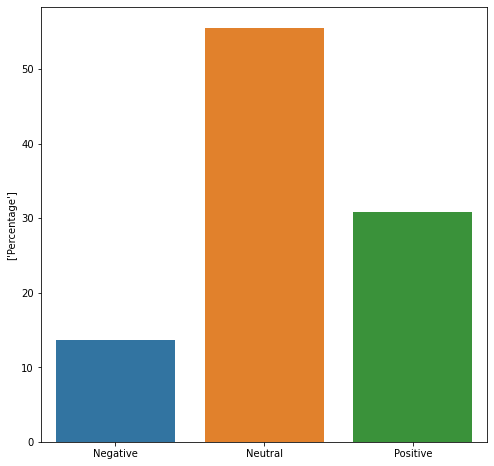

,neg,neu,pos,compound,sentence,label
0,0.535,0.465,0.0,-0.3182,I lost my suitcase,-1
1,0.000,1.000,0.0,0.0000,Riding on a runaway train,0
2,0.000,1.000,0.0,0.0000,Got sunburned dancing waiting for the evening rain,0
3,0.000,1.000,0.0,0.0000,"When I was resting, it only washed into my skin",0
4,0.000,1.000,0.0,0.0000,"And when I woke up, dawn was starting to begin",0


In [9]:
#General sentiment by words spoken by youtubers

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for channelId in LIST_OF_CHANNEL_IDS:
    for sentence in sentenceCloud[channelId]:
        pol_score = sia.polarity_scores(sentence)
        pol_score['sentence']=sentence
        results.append(pol_score)
pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
df['label']=0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1

import seaborn as sns
import matplotlib.pyplot as plt
fix, ax = plt.subplots(figsize=(8,8))
counts = df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel(["Percentage"])
plt.show()

df.head()

# By channel by sentences

In [5]:
sentenceCloud[LIST_OF_CHANNEL_IDS[34]]

['I’m sure you’ve heard of the term&nbsp;',
 'Clients from HELL. Wait No that ain’t&nbsp;&nbsp;',
 'right. There you go. CLIENTS FROM HAIL.',
 'You know why? Because HAILstorms are&nbsp;&nbsp;',
 'unpredictable like our lives are. When they drop&nbsp;',
 'they could cause MASSIVE havoc to our lives.&nbsp;',
 "Here's the thing. I design in the real world, and I realized&nbsp;",
 'that working freelance and working in',
 'agencies are not that all different. In fact,&nbsp;',
 "they're pretty much the same, except in terms of payment.&nbsp;",
 'Agencies have sets of rules, a whole list&nbsp;',
 'of terms and conditions. In real life,&nbsp;&nbsp;',
 'designers too, use contracts with clients. (PSST&nbsp;',
 'if you’re a freelancer and you’re doing&nbsp;&nbsp;',
 'work without contracts yet, you’d better start&nbsp;',
 'reading up on WHY you should have one).&nbsp;&nbsp;',
 'The contract protects both the designer and&nbsp;the',
 'client in case any side wants to withdraw or run&nbsp;away',

In [6]:
#General sentiment by words spoken by youtubers

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
channelId_to_sentencedf = {}

for channelId in LIST_OF_CHANNEL_IDS:
    results = []
    for sentence in sentenceCloud[channelId]:
        pol_score = sia.polarity_scores(sentence)
        pol_score['sentence']=sentence
        results.append(pol_score)
    pd.set_option('display.max_columns', None, 'max_colwidth', None)
    df = pd.DataFrame.from_records(results)
    channelId_to_sentencedf[channelId] = df
df['label']=0
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1


In [7]:
from IPython.display import display

for channelId in LIST_OF_CHANNEL_IDS:
    display(channelId_to_sentencedf[channelId][200:250])

,neg,neu,pos,compound,sentence
200,0.000,0.500,0.500,0.4588,my favorite mom-and-pop italian
201,0.000,1.000,0.000,0.0000,restaurants in the los angeles area
202,0.000,1.000,0.000,0.0000,frito misto and kolori kitchen they skip
203,0.000,0.667,0.333,0.3612,the [ __ ] with like the hoity-toity
204,0.000,0.545,0.455,0.3612,prices and they're like
205,0.000,1.000,0.000,0.0000,we don't serve bread we serve rolls plus
206,0.000,0.476,0.524,0.6705,i'm pretty sure i saw emma stone in
207,0.000,1.000,0.000,0.0000,calorie kitchen with andrew garfield
208,0.000,1.000,0.000,0.0000,when they were shooting spider-man
209,0.000,1.000,0.000,0.0000,and i think i may have witnessed the


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,"Anyway, skipping ahead a little bit"
201,0.000,1.000,0.000,0.0000,Renesnee has now grown up because she ages
202,0.000,1.000,0.000,0.0000,really fast for some mysterious reason
203,0.000,1.000,0.000,0.0000,and Bella's getting used to her new life of
204,0.000,1.000,0.000,0.0000,doing...
205,0.000,0.385,0.615,0.4939,pretty much nothing.
206,0.000,0.444,0.556,0.3612,I mean like really
207,0.000,0.809,0.191,0.2235,"they don't eat, they don't sleep, no one goes"
208,0.161,0.839,0.000,-0.2755,"to school anymore, it doesn't look like anyone has a job or anything,"
209,0.000,0.660,0.340,0.4740,So like what're you guys even doing?!


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,"Which in a few months, I'd learn a lasting life lesson from"
201,0.063,0.684,0.254,0.6542,"Cody was tall, slim, was subtly nerdy but also exceeded an air of confidence"
202,0.000,0.667,0.333,0.4588,More than anything he had cute hair
203,0.337,0.396,0.267,-0.1779,I was always a sucker for interesting hairstyles
204,0.000,1.000,0.000,0.0000,Despite him being in my year
205,0.000,1.000,0.000,0.0000,I'd never actually really seen him before
206,0.000,1.000,0.000,0.0000,This wasn't entirely uncommon with the way our year groups were splits
207,0.000,1.000,0.000,0.0000,But as we started talking we immediately hit it off
208,0.000,1.000,0.000,0.0000,Our task at the woodworking Club was to build birdhouses for the school grounds
209,0.000,0.855,0.145,0.2960,And of course me being me went above and beyond in creating some elaborate


,neg,neu,pos,compound,sentence
200,0.169,0.831,0.000,-0.0572,taking notes look I don't want to give
201,0.139,0.567,0.295,0.3352,them too much credit I don't want to
202,0.000,0.765,0.235,0.2846,encourage theft at any scale but the way
203,0.000,0.759,0.241,0.2263,this robbery took place is straight out
204,0.381,0.619,0.000,-0.5719,of a fast and furious movie according to
205,0.000,1.000,0.000,0.0000,Jeffrey the launch of Blue Blood was so
206,0.000,0.693,0.307,0.4767,ambitious and so large in scope that he
207,0.000,1.000,0.000,0.0000,had to spread out the units throughout
208,0.000,1.000,0.000,0.0000,his multiple warehouses to keep them
209,0.000,0.625,0.375,0.3400,secure we're talking over 1 million


,neg,neu,pos,compound,sentence
200,0.140,0.750,0.110,-0.1531,"I was just freaking karate chop that person's arm out of the way. Yeah, people thought I was a psychopath"
201,0.112,0.727,0.161,0.2235,But it wasn't my fault okay? When we left Middle school and started high school
202,0.000,1.000,0.000,0.0000,"I don't know how he did it, but somehow. He was able to make the acronym milf which stands for well... You can look it up"
203,0.000,1.000,0.000,0.0000,Become a very commonly used phrase in our school
204,0.000,1.000,0.000,0.0000,he would make all kinds of variations of the word a desk would become a dilf a
205,0.000,1.000,0.000,0.0000,Pencil would become a pencilf he even called me bilfy at one point
206,0.081,0.812,0.107,0.1779,There was no word in the English dictionary that was safe sooner or later everyone who knew shimada-san which was most people in school
207,0.000,0.690,0.310,0.7351,"He was a pretty popular guy, just started milfing up their sentences dang. I got really milfed by that test yesterday"
208,0.000,1.000,0.000,0.0000,"Hey, do you have any papilf? I can borrof are you going to prilf this year? Oh?"
209,0.000,1.000,0.000,0.0000,"What, prilf?"


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,replacement cartridges are sent for a
201,0.000,1.000,0.000,0.0000,few bucks a month we are talking about
202,0.000,1.000,0.000,0.0000,Razer cartridges again but I did for a
203,0.000,0.676,0.324,0.3400,second get excited that the butt-wipes
204,0.000,1.000,0.000,0.0000,came in a fully automatic magazine at
205,0.000,0.722,0.278,0.4019,any rate while they clearly need me on
206,0.000,1.000,0.000,0.0000,R&amp;D I have found my entire bathroom
207,0.000,1.000,0.000,0.0000,experience to actually be much more
208,0.000,1.000,0.000,0.0000,convenient because I don't have to
209,0.000,1.000,0.000,0.0000,remember to buy the little things I


,neg,neu,pos,compound,sentence
200,0.000,0.686,0.314,0.4939,hand I'm sponsored by Red Bull you know
201,0.000,0.619,0.381,0.5106,yeah go get a man ah all right well it
202,0.000,0.706,0.294,0.3612,seems like one of my teammates knows
203,0.000,1.000,0.000,0.0000,what they're I am never gonna level up
204,0.157,0.843,0.000,-0.0772,am i hey dude I'm sorry man I can't find
205,0.220,0.780,0.000,-0.3071,the enemy flag on this map but but we're
206,0.000,0.690,0.310,0.2023,playing team deathmatch wait a minute
207,0.485,0.515,0.000,-0.6908,that our team just get a kill
208,0.220,0.600,0.180,-0.1027,did the afk guy start playing no then
209,0.000,1.000,0.000,0.0000,then who was that man I'm never gonna


,neg,neu,pos,compound,sentence
200,0.688,0.312,0.000,-0.2960,"No, I don't."
201,0.000,1.000,0.000,0.0000,I learned
202,0.000,1.000,0.000,0.0000,Madz: mine from Mario
203,0.000,1.000,0.000,0.0000,Curt: bros.
204,0.000,0.000,1.000,0.2960,Yeah.
205,0.000,0.444,0.556,0.3612,And learning like
206,0.000,0.625,0.375,0.2023,flirting from Mario bros.
207,0.000,1.000,0.000,0.0000,This is the same guy whose girl keeps
208,0.000,1.000,0.000,0.0000,getting kidnapped with heavy air quotes.
209,0.783,0.217,0.000,-0.5574,Oh shit.


,neg,neu,pos,compound,sentence
200,0.000,0.872,0.128,0.2960,I forgot to mention that my dad actually made me take Taekwondo classes when I was younger yeah
201,0.085,0.666,0.248,0.4422,"Yeah, don't ask. I kinda accidentally made Chad cry, but this also earned me some cool points with all the kids"
202,0.000,0.853,0.147,0.4767,Eventually it started making friends because of well... Pokemon. I was literally the only girl in the group of kids
203,0.000,0.925,0.075,0.1779,"that would bring the game boys to school. All the other kids will play pokemon for money, but I would never have money"
204,0.235,0.765,0.000,-0.2850,So I can never join in the first place
205,0.000,0.917,0.083,0.1154,"Okay, maybe I spend my money on a couple bags of Doritos, but let's not talk about that either"
206,0.306,0.379,0.315,-0.1779,I'd like to say that I love competitive battling but in all honesty. I get too frustrated when I lose in games
207,0.224,0.776,0.000,-0.3818,"Anywho Z's in one of those battles. I remember a kid saying,"
208,0.000,1.000,0.000,0.0000,"""Aww, you have an Arcanine?"
209,0.097,0.627,0.276,0.3736,"Do you want to trade? Please? I would pay three dollars for that."""


,neg,neu,pos,compound,sentence
200,0.000,0.680,0.320,0.5106,encourage you to do the same although if
201,0.333,0.667,0.000,-0.3612,you are a naturally lazy person this
202,0.231,0.769,0.000,-0.2732,will make you feel a lot of guilt and
203,0.310,0.690,0.000,-0.4019,you probably get nagged a lot you know
204,0.000,1.000,0.000,0.0000,what let's just add another name to them
205,0.000,0.000,1.000,0.2263,okay
206,0.136,0.357,0.507,0.7351,the nagger but it's for the greater good
207,0.000,0.805,0.195,0.1154,the couchsurfers okay not all but but
208,0.000,1.000,0.000,0.0000,most of these guys will hit you with the
209,0.000,1.000,0.000,0.0000,I'm homeless right now


,neg,neu,pos,compound,sentence
200,0.000,0.761,0.239,0.2960,happened yeah what did Dan know the dude
201,0.000,1.000,0.000,0.0000,I didn't even talk to the dude I know
202,0.000,1.000,0.000,0.0000,what by showing up I managed to make
203,0.342,0.658,0.000,-0.3818,someone dislike me ganking mid I'm
204,0.000,1.000,0.000,0.0000,thinking what are you doing here this is
205,0.000,1.000,0.000,0.0000,really far from Italy I was watching
206,0.000,0.449,0.551,0.5994,youtubers while I play video games like
207,0.000,1.000,0.000,0.0000,listening to them
208,0.000,0.517,0.483,0.6808,hi it makes me feel like I have friends
209,0.000,0.476,0.524,0.2960,yeah I know right


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,dollars to print it
201,0.737,0.263,0.000,-0.6808,starving artists and starving
202,0.000,1.000,0.000,0.0000,architecture students get along
203,0.434,0.566,0.000,-0.5574,avoid using glue gun for your models it
204,0.376,0.624,0.000,-0.3412,doesn't dry nicely and sometimes
205,0.000,1.000,0.000,0.0000,leaves those spider web glue bits as
206,0.000,1.000,0.000,0.0000,i've mentioned before keep the engineers
207,0.000,1.000,0.000,0.0000,in mind
208,0.000,1.000,0.000,0.0000,they have to make your design stand if
209,0.000,1.000,0.000,0.0000,you think a 20 by 20 meter room can hold


,neg,neu,pos,compound,sentence
200,0.000,0.625,0.375,0.4588,accessible on all your favorite devices
201,0.000,0.864,0.136,0.0258,use my link vericose lush and me reach
202,0.000,1.000,0.000,0.0000,you or it click the link in the
203,0.000,0.645,0.355,0.5106,description and try out a 30 day a free
204,0.000,1.000,0.000,0.0000,trial of Verve premium today check it
205,0.000,1.000,0.000,0.0000,out and let me know what you think I
206,0.000,1.000,0.000,0.0000,should be watching that's VR v dot co /
207,0.000,0.734,0.266,0.4404,EMI RI CH u and also big thanks to Tim
208,0.000,1.000,0.000,0.0000,Tom for clapping with me on this video
209,0.000,1.000,0.000,0.0000,so I also did a collab on Tim's channel


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,[Applause]
201,0.000,1.000,0.000,0.0000,hey guys so today in this video I'm
202,0.000,1.000,0.000,0.0000,gonna be answering some of your
203,0.000,1.000,0.000,0.0000,questions and I said answering hey guys
204,0.000,0.680,0.320,0.5095,so welcome to my first Q&amp;A so the
205,0.000,1.000,0.000,0.0000,channel has grown a lot within the past
206,0.000,1.000,0.000,0.0000,seven months and I thought this would be
207,0.000,0.674,0.326,0.4404,a good way for me to reintroduce myself
208,0.000,1.000,0.000,0.0000,to you so that you can can tell me and
209,0.000,0.822,0.178,0.0772,stuff whatever we want story meme videos


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,uploaded his video
201,0.000,1.000,0.000,0.0000,he even apparently did it to him causing
202,0.000,1.000,0.000,0.0000,him to get five
203,0.310,0.690,0.000,-0.4019,thousand dislikes in the span of about
204,0.000,1.000,0.000,0.0000,20 minutes
205,0.000,1.000,0.000,0.0000,he doesn't give a [ __ ] with my journey
206,0.275,0.725,0.000,-0.2263,he's an insensitive [ __ ] he also
207,0.000,0.674,0.326,0.4404,thinks it's funny to tell youtubers who
208,0.789,0.211,0.000,-0.8176,are suffering from cancer
209,0.000,1.000,0.000,0.0000,that he can't wait to report on the


,neg,neu,pos,compound,sentence
200,0.000,0.505,0.495,0.5994,of my friends who were playing animal
201,0.000,1.000,0.000,0.0000,crossing at launch have completely
202,0.000,1.000,0.000,0.0000,dropped it and even though me and 9 out
203,0.000,0.693,0.307,0.4767,of 10 of my friends can now be
204,0.773,0.227,0.000,-0.5267,considered losers
205,0.000,1.000,0.000,0.0000,people putting down the game can be
206,0.000,0.180,0.820,0.7964,easily justified and feeling like you've
207,0.000,1.000,0.000,0.0000,done everything
208,0.415,0.366,0.220,-0.3818,repetition of playing getting frustrated
209,0.000,0.617,0.383,0.4767,with joining your friends even though


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,you be here I'm here to talk about
201,0.000,1.000,0.000,0.0000,arcades more specifically game arcades
202,0.000,1.000,0.000,0.0000,as weren't originally applied to any
203,0.000,1.000,0.000,0.0000,buildings with arches or columns that
204,0.000,0.706,0.294,0.3612,were used as venues for things like
205,0.000,0.517,0.483,0.4215,shopping entertainment and eventually
206,0.000,1.000,0.000,0.0000,games so that's why we're starting here
207,0.000,1.000,0.000,0.0000,in 1910 where the term penny arcade is
208,0.167,0.513,0.321,0.2960,first coined sorry folks that's comedy
209,0.485,0.515,0.000,-0.5719,step right up and forget your worries


,neg,neu,pos,compound,sentence
200,0.268,0.732,0.000,-0.2960,your neck before putting earbuds in no
201,0.291,0.709,0.000,-0.3535,more dangling cords no more ear buds
202,0.000,0.761,0.239,0.2960,dropping on the ground if they fall yeah
203,0.372,0.628,0.000,-0.5499,but you see the biggest problem with
204,0.255,0.510,0.235,-0.0516,this solution is that I'm lazy and I
205,0.000,1.000,0.000,0.0000,won't do anything that takes me more
206,0.000,1.000,0.000,0.0000,than five seconds can you make a body
207,0.000,1.000,0.000,0.0000,builder comic I've already made one but
208,0.000,1.000,0.000,0.0000,I can make another one right now hello
209,0.000,0.843,0.157,0.0772,do you want to go bodybuilding not right


,neg,neu,pos,compound,sentence
200,0.000,0.737,0.263,0.3612,didn't if we looked at it for like a
201,0.000,1.000,0.000,0.0000,second
202,0.000,0.577,0.423,0.5267,and then was like okay draw ocs from
203,0.000,1.000,0.000,0.0000,memory wait
204,0.000,0.808,0.192,0.2263,okay hold on what do you think should we
205,0.000,0.577,0.423,0.5267,just finish this off and be like okay
206,0.000,0.741,0.259,0.4215,you get one nice oc drawing and the rest
207,0.000,1.000,0.000,0.0000,are from memory
208,0.000,0.420,0.580,0.7096,i fit down okay we'll do it like that
209,0.000,0.286,0.714,0.3612,thank you


,neg,neu,pos,compound,sentence
200,0.000,0.526,0.474,0.5423,alright thank you so much for watching I
201,0.000,1.000,0.000,0.0000,know this whole update video is kind of
202,0.294,0.706,0.000,-0.3612,a mess because I'm all over the place
203,0.000,1.000,0.000,0.0000,and I'm not really organized but I
204,0.000,1.000,0.000,0.0000,haven't uploaded anything in a while I
205,0.000,0.737,0.263,0.3612,was like maybe I should just talk to the
206,0.000,1.000,0.000,0.0000,people because they don't know what's
207,0.000,1.000,0.000,0.0000,going on and they could think that I
208,0.643,0.357,0.000,-0.5574,just I just died
209,0.243,0.757,0.000,-0.2317,and they still wouldn't really care but


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,He'll just be Regular Burger.
201,0.287,0.585,0.128,-0.4588,Jaiden: And then no one can play with this card because he'll be powerless.
202,0.000,1.000,0.000,0.0000,I'm going to give you a... clue.
203,0.000,0.870,0.130,0.2023,A small Japanese flag can be seen on the top of this creature's bun.
204,0.000,1.000,0.000,0.0000,Nathan: Got it.
205,0.000,0.683,0.317,0.4173,Jaiden: So he's like a little Japanese boy.
206,0.000,0.803,0.197,0.4019,"Nathan: *laughs* Yes, because all-- all little Japanese boys have a *laughs* flag..."
207,0.000,0.828,0.172,0.3612,Jaiden: Do you think they have like a little cocoon for their little babies?
208,0.000,1.000,0.000,0.0000,"Nathan: Oh, little sliders?"
209,0.000,1.000,0.000,0.0000,*GASP* (excited Jaiden noises)


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,is really all I can do for right now it
201,0.000,1.000,0.000,0.0000,is late at night and I still have so
202,0.000,1.000,0.000,0.0000,much to do in preparation for VidCon so
203,0.000,1.000,0.000,0.0000,go ahead and ask me more questions in
204,0.000,1.000,0.000,0.0000,the comment section below
205,0.000,0.828,0.172,0.1695,and don't forget you can also ask me on
206,0.000,1.000,0.000,0.0000,Twitter or Instagram you can ask me
207,0.000,1.000,0.000,0.0000,about animation you can ask me about
208,0.000,1.000,0.000,0.0000,drawing you can ask me about my shoe
209,0.230,0.633,0.137,-0.2213,size not really sure why you'd want to


,neg,neu,pos,compound,sentence
200,0.198,0.494,0.309,0.2263,instead of stopping and starting like
201,0.000,1.000,0.000,0.0000,Frogger and its several sequels
202,0.000,0.714,0.286,0.2498,including but not limited to frogs
203,0.000,1.000,0.000,0.0000,journey
204,0.275,0.725,0.000,-0.2263,The Forgotten relic and because making
205,0.000,1.000,0.000,0.0000,an entire new piece of middleware from
206,0.000,1.000,0.000,0.0000,scratch alongside a game sets a release
207,0.000,0.822,0.178,0.0762,within the year wasn't hard enough they
208,0.000,1.000,0.000,0.0000,also have just decided hey what have we
209,0.000,1.000,0.000,0.0000,made it so that every location which


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,The phones are down.
201,0.538,0.462,0.000,-0.5423,Things must be bad.
202,0.000,0.580,0.420,0.4404,"I'd better go back there."""
203,0.000,1.000,0.000,0.0000,Nicholas hopped on the next
204,0.000,1.000,0.000,0.0000,train back to Petrograd
205,0.000,1.000,0.000,0.0000,but he never made it to the city.
206,0.000,1.000,0.000,0.0000,His train was met by military generals
207,0.000,1.000,0.000,0.0000,and other politicians.
208,0.000,1.000,0.000,0.0000,"""What's going on?"""
209,0.000,1.000,0.000,0.0000,"""Nicholas, look man, we need to talk."


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,armies of uncheck testosteron Hour began
201,0.207,0.431,0.362,0.4215,Tecna crazy people love you so much
202,0.286,0.714,0.000,-0.3400,different mind are crazy for you think
203,0.000,1.000,0.000,0.0000,that someone know when She is right Nasa
204,0.000,0.737,0.263,0.3612,like comme un to get National Heart do
205,0.000,0.511,0.489,0.7717,you like best of Star command Line of us
206,0.000,0.769,0.231,0.2732,was that people as well my teacher that
207,0.000,0.544,0.456,0.6169,I do n't know any crazy people Welcome to
208,0.000,0.686,0.314,0.4939,my friend the end of Road trip and
209,0.412,0.588,0.000,-0.4215,disadvantage you know when someone


,neg,neu,pos,compound,sentence
200,0.643,0.357,0.000,-0.8020,which made nausea and died terribly
201,0.000,1.000,0.000,0.0000,well-acquainted back then so I was very
202,0.000,1.000,0.000,0.0000,aware of the signs on ones face when
203,0.362,0.638,0.000,-0.5267,they're about to puke out their lunch
204,0.000,1.000,0.000,0.0000,and when I saw Ivana sit up from the bed
205,0.000,1.000,0.000,0.0000,I knew only one thing was coming and it
206,0.271,0.729,0.000,-0.3818,was coming in fast oh crap that a second
207,0.000,1.000,0.000,0.0000,thought
208,0.314,0.686,0.000,-0.4939,Ivana left out of bed and made a mad
209,0.000,1.000,0.000,0.0000,dash for the bathroom my pals obviously


,neg,neu,pos,compound,sentence
200,0.181,0.819,0.000,-0.1406,Rando jerks to heart but we can't just
201,0.254,0.491,0.255,0.0042,be defeated so easily we got to stay
202,0.000,0.708,0.292,0.5106,strong so what I'm trying to say is just
203,0.000,1.000,0.000,0.0000,be yourself
204,0.000,0.843,0.157,0.0772,I mean of course if you want to change
205,0.259,0.463,0.278,0.0516,for the sake of improvement freaking go
206,0.000,1.000,0.000,0.0000,for it figuring out ways to live a
207,0.000,0.649,0.351,0.4019,healthy lifestyle because the one you've
208,0.000,0.594,0.406,0.6249,chosen isn't working for you it's great
209,0.000,1.000,0.000,0.0000,all I mean is you don't have to give up


,neg,neu,pos,compound,sentence
200,0.000,0.783,0.217,0.3612,"Few weeks ago, I get a text from Tina and she's like"
201,0.000,1.000,0.000,0.0000,Yo! You live in LA now?
202,0.000,1.000,0.000,0.0000,We need to hang out
203,0.000,0.485,0.515,0.6486,"Alright, I'm free on Wednesday, come through"
204,0.000,1.000,0.000,0.0000,We'll go get something to eat
205,0.000,1.000,0.000,0.0000,"She comes over, we jump in the Uber"
206,0.000,1.000,0.000,0.0000,And we're on our way to the resturant
207,0.000,0.737,0.263,0.3612,"We pass a Wonder Woman billboard, and she's like"
208,0.000,1.000,0.000,0.0000,'That should have been me'
209,0.000,0.828,0.172,0.3612,"And I'm like, 'What do you mean, did you audition for Wonder Woman?'"


,neg,neu,pos,compound,sentence
200,0.117,0.751,0.131,0.0772,"You post it. You look at it. You see all the mistakes, you realize people already liked it"
201,0.000,1.000,0.000,0.0000,"And you come to senses with your reality, telling yourself this is never going to be fixed, the end"
202,0.115,0.826,0.060,-0.2960,"Number three, so there's another way you could find your mistakes without having anyone else to evaluate it for you."
203,0.000,1.000,0.000,0.0000,"So here's what you do, you walk towards the mirror, you hold your drawing up to the mirror"
204,0.000,0.680,0.320,0.7650,And you start rethinking your life purpose. It's like when you finally thought you made a masterpiece
205,0.184,0.816,0.000,-0.5574,"You just used this method, and it turns out it was just chicken shit this whole time."
206,0.131,0.601,0.268,0.3612,"All jokes aside though, I do think this is a good way to find your errors."
207,0.074,0.816,0.110,0.1875,"So feel free to use this technique, (really low creepy whisper voice) but don't take my word for it..."
208,0.000,0.669,0.331,0.5349,"Number four,"" Oh hey I like your drawings!"", ""Really? You do? Thanks."""
209,0.000,0.850,0.150,0.3182,"(in head) ""Please don't lead up to what I think it will lead up to"""


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,"Now, if I was uncreative, I'd"
201,0.000,1.000,0.000,0.0000,probably name it something
202,0.000,1.000,0.000,0.0000,along the lines of McDouunald's.
203,0.000,1.000,0.000,0.0000,"But since I'm not,"
204,0.000,1.000,0.000,0.0000,"I worked at WackDonald's,"
205,0.000,1.000,0.000,0.0000,because that place was wack.
206,0.000,1.000,0.000,0.0000,(audience claps and cheers)
207,0.000,0.278,0.722,0.6369,"Oh, yes, thank you."
208,0.000,0.615,0.385,0.3612,In Australia we like to
209,0.000,1.000,0.000,0.0000,shorten our words by a lot.


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,again magnet test
201,0.000,1.000,0.000,0.0000,48% my G I felt so
202,0.342,0.541,0.117,-0.5423,fraid you see if you want to ruin
203,0.000,1.000,0.000,0.0000,someone emotionally you don't start off
204,0.000,1.000,0.000,0.0000,by being it told because they'll
205,0.000,1.000,0.000,0.0000,immediately put up a wall you gotta earn
206,0.000,0.426,0.574,0.6597,their trust first create a sense of
207,0.000,0.676,0.324,0.3400,camaraderie security and then when they
208,0.000,1.000,0.000,0.0000,need you the most
209,0.352,0.648,0.000,-0.5859,that's when you stab him in the back


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,club and it's really not a dating game
201,0.000,1.000,0.000,0.0000,but also they even door
202,0.362,0.638,0.000,-0.5267,gird conspiracy behind it if you guys
203,0.000,1.000,0.000,0.0000,are somehow watching this and you still
204,0.000,1.000,0.000,0.0000,don't know what I'm talking about
205,0.000,0.417,0.583,0.7906,you should go watch it's pretty amazing
206,0.000,1.000,0.000,0.0000,after this video of course though I
207,0.000,1.000,0.000,0.0000,don't know for some reason even though
208,0.293,0.707,0.000,-0.4404,it scared me I still wanted to know more
209,0.000,1.000,0.000,0.0000,so I decided to go to their secondary


,neg,neu,pos,compound,sentence
200,0.565,0.435,0.000,-0.5994,a video I might actually die.
201,0.000,1.000,0.000,0.0000,NEW PANTS!
202,0.000,1.000,0.000,0.0000,LET’S GO!
203,0.000,0.606,0.394,0.5994,"It was a beautiful day in southern California,"
204,0.000,0.737,0.263,0.3612,"like most YouTubers I live in LA now, RIP"
205,0.182,0.579,0.240,0.1779,"Boise you will be missed, and I had the bright"
206,0.000,1.000,0.000,0.0000,idea to go camping.
207,0.000,1.000,0.000,0.0000,“I should go camping with some friends”
208,0.270,0.449,0.281,0.0258,"I said to myself, like a crazy person."
209,0.000,0.721,0.279,0.4767,And I called up some friends to see what they


,neg,neu,pos,compound,sentence
200,0.000,0.690,0.310,0.2023,place playing video games chillin
201,0.000,1.000,0.000,0.0000,practicing martial arts self-defense
202,0.000,0.745,0.255,0.3400,it was such an amazing times but then
203,0.000,0.638,0.362,0.5267,one of them started to show affection
204,0.226,0.774,0.000,-0.1901,towards me I tried to ignore it but
205,0.420,0.580,0.000,-0.4404,dirty messages and overall behavior
206,0.189,0.811,0.000,-0.1027,really started to get on my nerves
207,0.000,0.562,0.438,0.5994,meanwhile I started to get super close
208,0.000,1.000,0.000,0.0000,at this hour guy and noticed that he's
209,0.000,0.678,0.322,0.2144,getting flirty as well but he wasn't so


,neg,neu,pos,compound,sentence
200,0.000,0.442,0.558,0.7430,well i'm not a big animator i just love
201,0.000,1.000,0.000,0.0000,drawing and bringing the little
202,0.000,1.000,0.000,0.0000,characters i have
203,0.000,1.000,0.000,0.0000,to life you can see them in my videos
204,0.000,1.000,0.000,0.0000,and
205,0.000,0.761,0.239,0.2960,yeah subscribe to watch more of them in
206,0.000,1.000,0.000,0.0000,action but i
207,0.000,1.000,0.000,0.0000,guess you're here for a reason
208,0.000,1.000,0.000,0.0000,and since you stumbled here why not stay
209,0.000,1.000,0.000,0.0000,awhile and listen


,neg,neu,pos,compound,sentence
200,0.000,0.444,0.556,0.3612,around like sonic
201,0.000,1.000,0.000,0.0000,hams are one of the many creatures me
202,0.000,0.617,0.383,0.4767,and my friends made up together
203,0.000,0.625,0.375,0.4588,some of my other favorite creatures
204,0.000,1.000,0.000,0.0000,include scrumbos
205,0.000,1.000,0.000,0.0000,grompers the pithecus and its evolutions
206,0.000,1.000,0.000,0.0000,klishkins and the gremlins i imagine
207,0.000,1.000,0.000,0.0000,them to hang out on big floating gardens
208,0.000,0.714,0.286,0.3400,where they do magic and play games
209,0.315,0.685,0.000,-0.3182,hocus pocus you've lost your focus


,neg,neu,pos,compound,sentence
200,0.000,0.335,0.665,0.8381,because i love both but with super
201,0.326,0.222,0.452,0.1779,powers comes with super villains yeah
202,0.000,0.725,0.275,0.2263,okay i can't have that whereas pokemon i
203,0.000,0.192,0.808,0.6369,would love
204,0.000,0.615,0.385,0.3612,to catch like random pokemon
205,0.000,1.000,0.000,0.0000,i would give up being a doctor right now
206,0.000,0.566,0.434,0.5574,if pokemon would come to life okay yes
207,0.000,0.270,0.730,0.4019,yes 100
208,0.000,1.000,0.000,0.0000,pokemon all the way let's go wolfie
209,0.000,1.000,0.000,0.0000,let's go be pokemon master


,neg,neu,pos,compound,sentence
200,0.208,0.792,0.000,-0.2732,have to cut out of this uh game called
201,0.000,0.649,0.351,0.5009,uh honeycomb so like it's just all
202,0.000,1.000,0.000,0.0000,korean games with it you basically melt
203,0.000,1.000,0.000,0.0000,sugar and put it into a tray and then
204,0.000,1.000,0.000,0.0000,you imprint a shape into it and i'm
205,0.231,0.769,0.000,-0.2732,assuming we use needle to then cut out
206,0.302,0.698,0.000,-0.5994,the shape and if we break it then we die
207,0.000,1.000,0.000,0.0000,if i had to guess
208,0.000,1.000,0.000,0.0000,that's a really specific guess sir
209,0.000,0.843,0.157,0.0772,i won't look man i mean if you want to


,neg,neu,pos,compound,sentence
200,0.00,1.000,0.000,0.0000,likely cry... and eat a cake...
201,0.00,0.392,0.608,0.6369,yeah - okay last question. Well it's not
202,0.00,0.589,0.411,0.4201,really a question... it's more like
203,0.00,1.000,0.000,0.0000,"questions, because it was asked a lot. And"
204,0.00,0.594,0.406,0.4767,"I just want to let you know, I saved the"
205,0.00,0.323,0.677,0.6369,best for last...
206,0.00,0.783,0.217,0.4660,are you ready? HOW DID YOU GET JAMES TO COLLAB WITH YOU??
207,0.00,1.000,0.000,0.0000,Now a lot of people asked
208,0.00,1.000,0.000,0.0000,"this, and here's the summed up version. So I was chillin on youtube and a video"
209,0.00,1.000,0.000,0.0000,popped up in my subscription box.


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,English at each other as possible it's
201,0.000,0.751,0.249,0.2484,the most competitive form of gaming in
202,0.000,1.000,0.000,0.0000,the world tonight we're talking to a
203,0.000,0.769,0.231,0.2023,player with one of the top trigger
204,0.000,0.706,0.294,0.3612,fingers in cyberspace mark man thank you
205,0.000,1.000,0.000,0.0000,for joining us
206,0.000,1.000,0.000,0.0000,Tiwa richard so mark tell me what is it
207,0.000,0.737,0.263,0.3612,about FPS gaming that makes you like it
208,0.000,0.506,0.494,0.5965,so much well I guess I just like the
209,0.000,1.000,0.000,0.0000,sounds of the noobs when are you known


,neg,neu,pos,compound,sentence
200,0.000,0.526,0.474,0.5423,And every single feeling and devotion I should
201,0.000,0.800,0.200,0.3612,Be living in every second like it is my last one
202,0.000,1.000,0.000,0.0000,I would
203,0.000,1.000,0.000,0.0000,Focus a little more on the outcome
204,0.318,0.682,0.000,-0.4215,I know I'll regret it when times up
205,0.261,0.455,0.284,0.0516,I feel like a ghost in an elevator
206,0.000,1.000,0.000,0.0000,Passing every single opening and
207,0.348,0.652,0.000,-0.1531,Stopping in between them
208,0.549,0.451,0.000,-0.7249,"Going up, but never quite reaching heaven"
209,0.000,0.588,0.412,0.4215,I'm sharing elevators with a demon


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,"actually, we're gonna give it two Ds"
201,0.000,1.000,0.000,0.0000,for the size of fucking batteries
202,0.278,0.722,0.000,-0.4019,that it took to power the damn thing.
203,0.000,1.000,0.000,0.0000,"Next up, Taboo."
204,0.000,0.667,0.333,0.4588,"Now, Taboo is a personal favorite of mine."
205,0.289,0.711,0.000,-0.2584,"If you've never played it before,"
206,0.000,1.000,0.000,0.0000,"basically it's the game of Pictionary,"
207,0.000,1.000,0.000,0.0000,but with words.
208,0.000,1.000,0.000,0.0000,You have to get your partner
209,0.000,0.795,0.205,0.2023,to guess the top word on the card


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,we need to do is come up with other
201,0.000,0.693,0.307,0.4767,me and my friends will each have a short
202,0.000,0.758,0.242,0.1531,amount of time to make a fighter
203,0.000,1.000,0.000,0.0000,and then we'll go through the results
204,0.000,0.682,0.318,0.4215,i'm hoping for some really unique and
205,0.268,0.362,0.371,0.4830,awesome fighters so it'll be tough to
206,0.000,1.000,0.000,0.0000,decide on just one
207,0.000,0.732,0.268,0.2960,but chances are it's just gonna be
208,0.000,0.633,0.367,0.4404,robbed this is gonna be funny
209,0.000,0.468,0.532,0.6901,oh my god he's so strong so


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,if you find someone's face and just
201,0.000,0.706,0.294,0.3612,change the eyebrow height they look like
202,0.000,1.000,0.000,0.0000,an entirely different person and I think
203,0.000,1.000,0.000,0.0000,that on average women have higher
204,0.237,0.763,0.000,-0.2911,eyebrows so when I drag it this way it
205,0.000,1.000,0.000,0.0000,starts to look more feminine now before
206,0.368,0.632,0.000,-0.5423,I fixed a fatal bug with my eigen vector
207,0.000,1.000,0.000,0.0000,eigenvalue calculation gender was
208,0.000,0.656,0.344,0.2716,actually the most important component
209,0.000,1.000,0.000,0.0000,and that kind of made sense to me


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,didn't get much footage because the
201,0.000,1.000,0.000,0.0000,person in front of me was constantly
202,0.302,0.698,0.000,-0.3818,holding up their fanarts and blocking my
203,0.374,0.626,0.000,-0.4576,view and it was really annoying
204,0.000,0.641,0.359,0.4215,but yeah that's basically what happened
205,0.219,0.781,0.000,-0.2411,I'm not gonna do a fan scroll for the
206,0.000,0.763,0.237,0.4215,end of this video but yeah the dam up on
207,0.000,1.000,0.000,0.0000,this is the first day of summer vacation
208,0.000,0.577,0.423,0.5267,and also VidCon silly fun it was so
209,0.000,0.549,0.451,0.6249,awesome meeting all you guys I'm


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,had to really cook for himself in that
201,0.000,1.000,0.000,0.0000,sense
202,0.000,0.667,0.333,0.3612,i'm too [ __ ] ready to cook
203,0.000,0.584,0.416,0.6096,it's true he got me there so uh okay
204,0.000,1.000,0.000,0.0000,here
205,0.000,0.835,0.165,0.1477,here's how you get garlic so you want to
206,0.000,0.737,0.263,0.3612,put your thumbs in there like this and
207,0.000,1.000,0.000,0.0000,we'll
208,0.000,0.403,0.597,0.7506,try yeah so yeah break apart um honestly
209,0.000,0.762,0.238,0.3612,i like a lot of garlic so you can do the


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,I added some shiny spit drips in the
201,0.227,0.773,0.000,-0.2617,mouth and on the tongue gross I know but
202,0.176,0.824,0.000,-0.1280,it would be even weirder if his tongue
203,0.376,0.624,0.000,-0.3863,was dirt dry don't want him dying of
204,0.000,0.667,0.333,0.3612,dehydration I think my redraw looks like
205,0.000,1.000,0.000,0.0000,what their creators intended and it
206,0.000,0.690,0.310,0.4019,makes me wish modern golbat was this
207,0.000,1.000,0.000,0.0000,goofy
208,0.000,1.000,0.000,0.0000,all right I can't defend this one they
209,0.479,0.521,0.000,-0.5563,did Wigglytuff dirty it's kind of hard


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,the comments boy boy says my little
201,0.000,0.732,0.268,0.2960,siblings have a joke for you what are
202,0.000,1.000,0.000,0.0000,the green grapes say to the purple grape
203,0.623,0.377,0.000,-0.5106,breathe you idiot
204,0.000,0.526,0.474,0.6597,I get it hope it makes you smile at
205,0.000,0.674,0.326,0.4404,least law have a good day you have a
206,0.000,0.408,0.592,0.4404,good day too
207,0.000,1.000,0.000,0.0000,nyan UFO says can you wear a hat for the
208,0.000,0.649,0.351,0.4019,rest of this episode yes a tangled
209,0.000,1.000,0.000,0.0000,dangle says whoopsie do here comes a GU


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,but as his sister's skin melted she
201,0.000,1.000,0.000,0.0000,revealed to be The Terminator
202,0.000,1.000,0.000,0.0000,she ran right towards him so Alex ran
203,0.331,0.669,0.000,-0.5356,too he got more and more scared he
204,0.000,1.000,0.000,0.0000,didn't know what to do but then out of
205,0.000,1.000,0.000,0.0000,nowhere a bucket of water appeared he
206,0.000,1.000,0.000,0.0000,took it and splashed her and she
207,0.275,0.725,0.000,-0.2263,disappeared I'm melting I'm melting she
208,0.000,1.000,0.000,0.0000,yelled as she faded Alex turned back and
209,0.000,1.000,0.000,0.0000,replied you have been terminated I got


,neg,neu,pos,compound,sentence
200,0.0,0.690,0.310,0.4019,always active on Twitter you can always
201,0.0,1.000,0.000,0.0000,tweet me or give me or whatever I don't
202,0.0,0.522,0.478,0.6705,mind yeah Oh fun fact about this summer
203,0.0,1.000,0.000,0.0000,camp thing did I mention in the video
204,0.0,1.000,0.000,0.0000,while in the process of making this
205,0.0,1.000,0.000,0.0000,video at the last couple months a little
206,0.0,1.000,0.000,0.0000,while ago I got called to that very same
207,0.0,1.000,0.000,0.0000,summer camp to talk about animation to
208,0.0,0.761,0.239,0.2960,the kids what what yeah that was really
209,0.0,0.253,0.747,0.8347,cool it was a really fun interesting


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,dark in there since the lights were off
201,0.000,1.000,0.000,0.0000,and all the windows were covered up
202,0.000,0.000,1.000,0.6486,pretty well
203,0.000,0.633,0.367,0.4404,and everything was good until I sneezed
204,0.000,1.000,0.000,0.0000,I got a blow my nose now
205,0.000,1.000,0.000,0.0000,so I did that and I went back outside
206,0.324,0.676,0.000,-0.3400,when I was outside I heard the fire
207,0.286,0.714,0.000,-0.3400,alarm go off and within a few minutes
208,0.375,0.625,0.000,-0.3400,the fire department arrived I quickly
209,0.000,1.000,0.000,0.0000,realized what I've done Oh


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,on and you didn't even know about it
201,0.000,0.763,0.237,0.1406,well I don't know either but I live
202,0.000,1.000,0.000,0.0000,under a rock what what thought the ladle
203,0.000,1.000,0.000,0.0000,of my life so I was swimming in my pool
204,0.000,1.000,0.000,0.0000,today when all of a sudden a thought
205,0.000,1.000,0.000,0.0000,came to me wait a second
206,0.000,1.000,0.000,0.0000,pancakes and waffles are the same thing
207,0.000,1.000,0.000,0.0000,why that thought came to me in the pool
208,0.000,0.568,0.432,0.5859,probably the chlorine wow I mean it
209,0.000,1.000,0.000,0.0000,makes sense aside from being made in


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,of depth and expressive mark making
201,0.000,0.843,0.157,0.0772,number seven is this heart thing it is
202,0.000,1.000,0.000,0.0000,made of acrylic paint on cardboard that
203,0.259,0.741,0.000,-0.2732,I cut up because I wanted to do more
204,0.306,0.694,0.000,-0.2960,surface manipulation I don't know if you
205,0.000,0.368,0.632,0.8625,can tell but I use like super glittery
206,0.000,1.000,0.000,0.0000,thread to sew it back together because I
207,0.000,1.000,0.000,0.0000,wanted to show up in the picture so
208,0.000,1.000,0.000,0.0000,that's why I did that
209,0.000,1.000,0.000,0.0000,Ethan my digital skull drawing which is


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,for the next three weeks doing homework
201,0.000,1.000,0.000,0.0000,what are you doing can't we do the
202,0.000,1.000,0.000,0.0000,homework together we how to see classes
203,0.000,0.633,0.367,0.4404,so how'd you know good I guess
204,0.239,0.761,0.000,-0.2960,no you're not what do you mean you
205,0.000,1.000,0.000,0.0000,haven't eaten in the past three weeks Oh
206,0.000,0.690,0.310,0.4019,what yes I have wait where's my stomach
207,0.000,1.000,0.000,0.0000,we wait and what am i reducing laddy
208,0.000,0.690,0.310,0.4019,let me help anymore I got you this
209,0.000,1.000,0.000,0.0000,instant ramen


,neg,neu,pos,compound,sentence
200,0.000,1.000,0.000,0.0000,animators Michael if you're watching the
201,0.231,0.769,0.000,-0.2732,French food critic in me wants to give
202,0.000,0.563,0.437,0.4767,you a big seal of approval
203,0.000,0.769,0.231,0.2023,I spent the remainder of the day playing
204,0.000,0.606,0.394,0.5994,jackbox la TV and super smash brothers
205,0.000,0.659,0.341,0.4767,with Korey Mads turtle and friends and
206,0.000,1.000,0.000,0.0000,at the end of the day my hotel group was
207,0.000,0.690,0.310,0.4019,all invited to this mansion party in
208,0.000,0.690,0.310,0.4019,Hollywood Hills and before you ask yes
209,0.000,0.658,0.342,0.4810,Kurt Ritchie was behind this party as


,neg,neu,pos,compound,sentence,label
200,0.324,0.676,0.000,-0.3400,they argue louder than baboons plucking,-1
201,0.636,0.364,0.000,-0.5423,their ass hairs,-1
202,0.000,0.270,0.730,0.6597,well that was fun,1
203,0.000,0.683,0.317,0.4173,that kid really smelled like an atomic,1
204,0.000,1.000,0.000,0.0000,fart,0
205,0.000,0.787,0.213,0.2263,you you know i'm still here right okay,1
206,0.000,0.737,0.263,0.3612,thank you for sitting down with us you,1
207,0.000,1.000,0.000,0.0000,may go back to class what's this a,0
208,0.485,0.515,0.000,-0.5719,detention slip no it's a coupon for some,-1
209,0.000,1.000,0.000,0.0000,shampoo you need it more than i do oh,0


In [8]:
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

,neg,neu,pos,compound,sentence,label
2,0.000,0.808,0.192,0.2263,okay here we go hey guys me Jordan and,1
4,0.000,0.789,0.211,0.3400,more you say hi ha hi Ryan how are you,1
5,0.000,0.780,0.220,0.3071,you closer to the mic this alright so we,1
7,0.652,0.348,0.000,-0.8176,people died apparently people die every,-1
8,0.000,0.763,0.237,0.3566,year or so right yeah go ahead and we,1


In [9]:
print(df_positive_negative.label.value_counts())

 1    2014
-1     893
Name: label, dtype: int64


NameError: name 'sns' is not defined

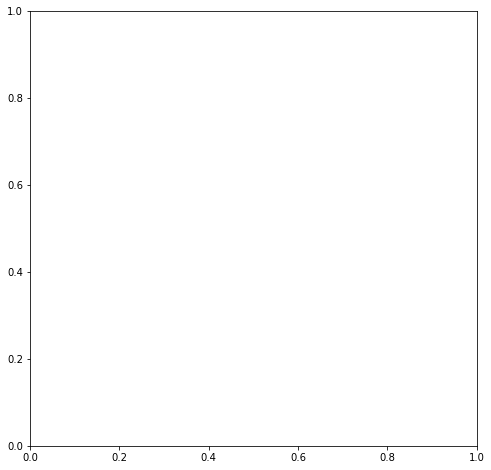

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
counts = df_positive_negative.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Neg', 'Pos'])
ax.set_ylabel('Percentage')
plt.show()

In [ ]:
top_20_pos_words = {}
top_20_neg_words = {}
scores= {}
for channelId in LIST_OF_CHANNEL_IDS:
    target_df = channelId_to_sentencedf[channelId]
    positive_words = list(target_df.loc[target_df['pos']==1].sentence)
    positive_frequency = FreqDist(positive_words)
    pos_freq = positive_frequency.most_common(20)
    negative_words = list(target_df.loc[target_df['neg']==1].sentence)
    negative_frequency = FreqDist(negative_words)
    neg_freq = negative_frequency.most_common(20)
    top_20_pos_words[channelId] = pos_freq
    top_20_neg_words[channelId] = neg_freq

    pos_words = [str(p) for p in pos_freq]
    pos_words_str = ', '.join(pos_words)
    neg_words = [str(n) for n in neg_freq]
    neg_words_str = ', '.join(neg_words)
    # generateWordCloud(pos_words_str, neg_words_str)

    scores[channelId] = sum(target_df['compound'])/len(target_df)
# print(scores)

channelName_to_scores = {}
for i in range(0, len(LIST_OF_CHANNEL_NAMES)):
    channelName_to_scores[LIST_OF_CHANNEL_NAMES[i]] = list(scores.values())[i]

avg_score=sum(channelName_to_scores.values())/len(LIST_OF_CHANNEL_NAMES)
print("avg score =", avg_score)
print(channelName_to_scores)
print(sorted(channelName_to_scores.items(), key=lambda item: item[1]))

avg score = 0.08108357082019477
{'Alex Clark': 0.12511905017212815, 'Alex Meyers': 0.101710173342626, 'WowRightMeow': 0.08816854174131132, 'Andrei Terbea': 0.06099520863081154, 'Billy But Better': 0.08979263685427905, 'Casually Explained': 0.07362420842944017, 'CircleToonsHD': 0.07858606456165129, 'CurtRichy': 0.08384791048467052, 'CypherDen': 0.06808188185542463, 'Daidus': 0.06898366486850935, 'DanPlan': 0.05497511187019755, 'Domics': 0.10238580477972715, 'Emirichu': 0.11027874248446, 'EroldStory': 0.11507509659290606, 'GradeAUnderA': 0.014606097560975638, 'GetMadz': 0.09165491091822814, 'GingerPale': 0.10900744269127717, 'Ice Cream Sandwich': 0.0910426470588234, 'illymation': 0.07580338454687165, 'Ivan Animated': 0.08914942616679404, 'Jaiden Animations': 0.08062958149207235, 'Let Me Explain Studios': 0.07389520283658355, 'Noodle': 0.06690282682007544, 'OverSimplified': -0.008489563758389364, 'TheOdd1sOut': 0.06449667373130859, 'PantslessPajamas': 0.073817246737104, 'SomeThingElseYT':

In [ ]:
sorted_channelName_to_scores = dict(sorted(channelName_to_scores.items(), key=lambda item: item[1]))
sctsdf = pd.DataFrame.from_dict({'channelName':sorted_channelName_to_scores.keys(), 'scores': sorted_channelName_to_scores.values()})
sctsdf

,channelName,scores
0,OverSimplified,-0.008490
1,brewstewfilms,-0.006457
2,GradeAUnderA,0.014606
3,Tabbes,0.037002
4,DanPlan,0.054975
5,The French Pineapple,0.057982
6,Andrei Terbea,0.060995
7,8 Bit Ultra,0.064023
8,TheOdd1sOut,0.064497
9,TimTom,0.064651


In [19]:
%matplotlib widget


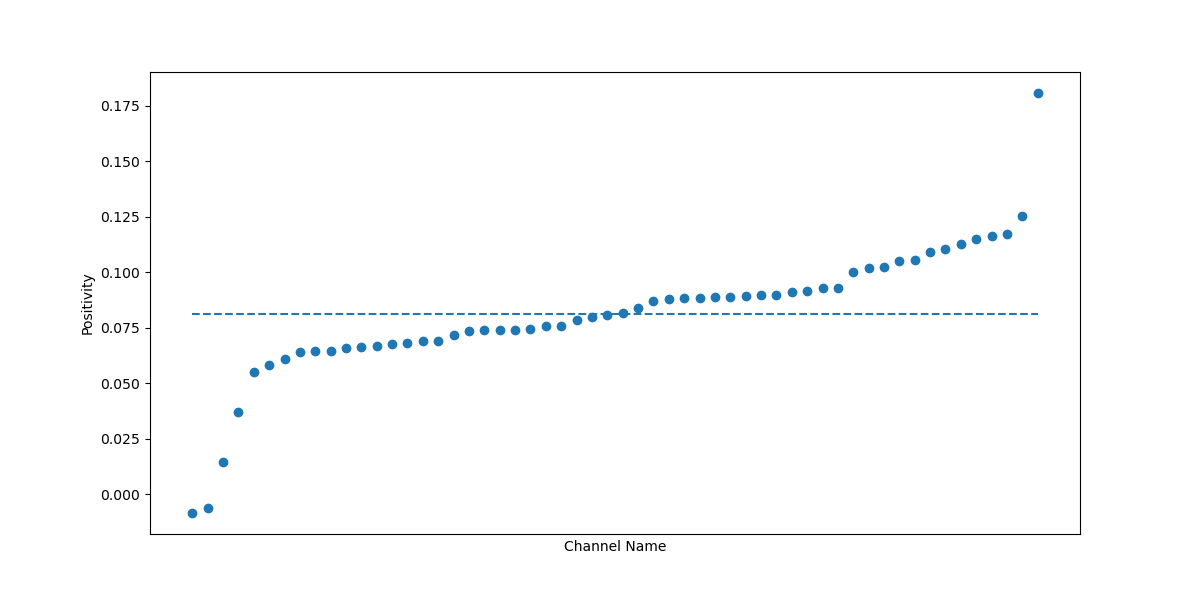

In [ ]:
x_name = "Channel Name"
y_name = "Positivity"
tooltip_name = "positivity value"

x= sctsdf['channelName']
y= sctsdf['scores']
tt = sctsdf['scores']

fig, ax = plt.subplots(1, figsize=(12,6))
sc = ax.scatter(x, y)
# Plot the average line
mean_x=np.arange(0,56,1)
mean_y=[avg_score for i in np.zeros_like(x)]
mean_line = ax.plot(mean_x,mean_y, label='Mean', linestyle='--')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()


In [25]:
num_of_files = []
for channelId in LIST_OF_CHANNEL_IDS:
    num_of_files.append(len(os.listdir(channelId+"/txt/")))
 
cntvdf = pd.DataFrame.from_dict({'channelName':LIST_OF_CHANNEL_NAMES, 'number of transcripts collected': num_of_files, 'number of vids': LIST_OF_VIDEO_COUNT})

cntvdf

,channelName,number of transcripts collected,number of vids
0,Alex Clark,298,318
1,Alex Meyers,250,258
2,WowRightMeow,27,33
3,Andrei Terbea,111,136
4,Billy But Better,23,23
5,Casually Explained,80,81
6,CircleToonsHD,223,251
7,CurtRichy,89,95
8,CypherDen,58,63
9,Daidus,31,33


In [26]:
representation = sum(cntvdf['number of transcripts collected'])/sum(cntvdf['number of vids'])
print(representation)

0.8315476190476191


In [27]:
#https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
subsPerYearSinceFirstUpload = channelHolisticInfoDf['subscribersPerYearSinceFirstUpload']

In [28]:
zipped = zip(channelHolisticInfoDf.channelName, channelHolisticInfoDf.subscribersPerYearSinceFirstUpload)
sorted_channelName_to_rescaledSubs = dict(sorted(dict(zipped).items(), key=lambda item: item[1]))
sctrs = pd.DataFrame.from_dict({'channelName': sorted_channelName_to_rescaledSubs.keys(), 'rescaledSubCount': sorted_channelName_to_rescaledSubs.values()})
sctrs

,channelName,rescaledSubCount
0,Wengsome,4.084054e+02
1,Donimation Studios,7.741079e+02
2,grgikau,2.231362e+03
3,uToonz,2.367358e+03
4,8 Bit Ultra,3.506715e+03
5,The French Pineapple,6.562435e+03
6,NeroTM Animations,1.389163e+04
7,Jacadamia,1.492675e+04
8,Ivan Animated,2.409741e+04
9,RushLight Invader,3.098739e+04


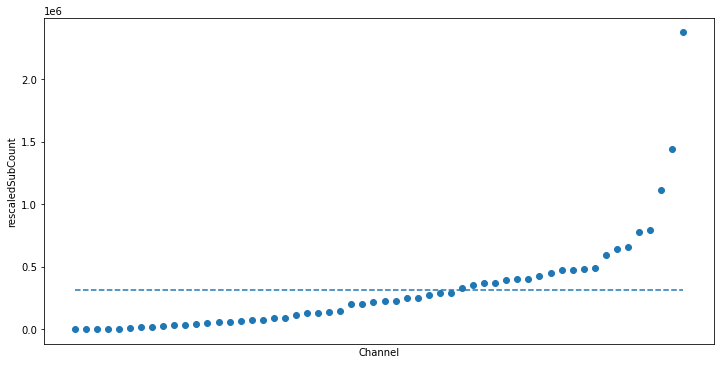

In [30]:
x_name = "Channel"
y_name = "rescaledSubCount"
tooltip_name = "subCountPerYearSinceFirstUpload"

x= sctrs['channelName']
y= sctrs['rescaledSubCount']
tt = sctrs['rescaledSubCount']

fig, ax = plt.subplots(1, figsize=(12,6))
sc = ax.scatter(x, y)
avg_rescaledSubcount= sum(y)/len(LIST_OF_CHANNEL_NAMES)
# Plot the average line
mean_x=np.arange(0,56,1)
mean_y=[avg_rescaledSubcount for i in np.zeros_like(x)]
mean_line = ax.plot(mean_x, mean_y, label='Mean', linestyle='--')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
cursor = mplcursors.cursor(sc, hover=True)

plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [ ]:
semantic_df = pd.DataFrame.from_dict({'channelName': channelHolisticInfoDf['channelName'], 'rescaledSubCount': subsPerYearSinceFirstUpload, 'positivityScores': channelName_to_scores.values()})
def generate_plot(semantic_df):
    x_name = "semantically positive"
    y_name = "rescaledSubCount"
    tooltip_name = "channelName"
    x= semantic_df['positivityScores']
    y= semantic_df['rescaledSubCount']
    tt = semantic_df[tooltip_name]
    fig, ax = plt.subplots(1, figsize=(12,6))
    sc = ax.scatter(x, y)

    avg_rescaledSubcount= sum(y)/len(LIST_OF_CHANNEL_NAMES)
    # Plot the average line
    mean_x=np.arange(0,33,1)
    mean_y=[avg_rescaledSubcount for i in np.zeros_like(x)]
    # mean_line = ax.plot(mean_x, mean_y, label='Mean', linestyle='--')

    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    def update_annot(details):
        pos = sc.get_offsets()[details["channelName"]]
        annot.xy = pos
        text = "{}, {}".format(" ".join(details["channelName"]), 
                            " ".join([details["positivityScores"]]))
        annot.set_text(text)
        annot.get_bbox_patch().set_alpha(0.4)

    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, details = sc.contains(event)
            if cont:
                update_annot(details)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    cursor = mplcursors.cursor(sc, hover=True)
    cursor.connect(
    "add", lambda sel: sel.annotation.set_text(tt[sel.index]))
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
generate_plot(semantic_df)

Pretty sure Oversimplified (and tbh, Odd1sOut) is messing up my calculations. 

In [ ]:
semantic_df = pd.DataFrame.from_dict({'channelName': channelHolisticInfoDf['channelName'], 'rescaledSubCount': subsPerYearSinceFirstUpload, 'positivityScores': channelName_to_scores.values()})
semantic_df

In [ ]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    index =0
    for y in data_1:
        print(y)
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append((index, y))
        index+=1
    return outliers
print(detect_outlier(subsPerYearSinceFirstUpload))
print(detect_outlier(list(channelName_to_scores.values())))

In [ ]:
copy_without_oversimplified = semantic_df.drop('23')
copy_without_odd1sout = semantic_df.drop(['24'])
copy_without_oversimplified_and_odd1sout = semantic_df.drop(['23','24'])
semantic_df_copy_without_oversimplified = pd.DataFrame.from_dict(json.loads(json.dumps(copy_without_oversimplified.to_dict())))
semantic_df_copy_without_odd1sout = pd.DataFrame.from_dict(json.loads(json.dumps(copy_without_odd1sout.to_dict())))
semantic_df_copy_without_oversimplified_and_odd1sout = pd.DataFrame.from_dict(json.loads(json.dumps(copy_without_oversimplified_and_odd1sout.to_dict())))

generate_plot(semantic_df_copy_without_oversimplified)
generate_plot(semantic_df_copy_without_odd1sout)

So how exactly strong is the correlation? 

If the rvalue is close to 0, then literally, there's no relationship between how positive a channel is. Using rvalue instead of r^2 because I just have two terms

In [ ]:
import numpy as np
import scipy.stats
x= 'rescaledSubCount'	
y= 'positivityScores'
result = scipy.stats.linregress(semantic_df[x], semantic_df[y])
result_no_oversimplified = scipy.stats.linregress(semantic_df_copy_without_oversimplified[x], semantic_df_copy_without_oversimplified[y])
result_no_odd1sout = scipy.stats.linregress(semantic_df_copy_without_odd1sout[x], semantic_df_copy_without_odd1sout[y])
result_no_oversimplified_and_odd1sout = scipy.stats.linregress(semantic_df_copy_without_oversimplified_and_odd1sout[x], semantic_df_copy_without_oversimplified_and_odd1sout[y])

print(result.rvalue)
print("removed positivity outlier: ", result_no_oversimplified.rvalue)
print("removed subCount outlier: ", result_no_odd1sout.rvalue)
print("removed both subCount and positivity outliers: ", result_no_oversimplified_and_odd1sout.rvalue)

Tbh, the results kind of suck. 
Need to test the null hypothesis
The null hypothesis is a typical statistical theory which suggests that **no statistical relationship and significance exists in a set of given single observed variable**, between two sets of observed data and measured phenomena.

In [ ]:
result_polyfit_lst = []
for i in range(5):
    result_polyfit_lst.append(np.polyfit(semantic_df[x], semantic_df[y], i, full=True))
print([i for i in result_polyfit_lst])

! https://opentextbc.ca/researchmethods/chapter/understanding-null-hypothesis-testing/
A crucial step in null hypothesis testing is finding the likelihood of the sample result if the null hypothesis were true. This probability is called the p value. A low p value means that the sample result would be unlikely if the null hypothesis were true and leads to the rejection of the null hypothesis. A high p value means that the sample result would be likely if the null hypothesis were true and leads to the retention of the null hypothesis. But how low must the p value be before the sample result is considered unlikely enough to reject the null hypothesis? In null hypothesis testing, this criterion is called α (alpha) and is almost always set to .05. If there is less than a 5% chance of a result as extreme as the sample result if the null hypothesis were true, then the null hypothesis is rejected. When this happens, the result is said to be statistically significant. If there is greater than a 5% chance of a result as extreme as the sample result when the null hypothesis is true, then the null hypothesis is retained. This does not necessarily mean that the researcher accepts the null hypothesis as true—only that there is not currently enough evidence to conclude that it is true. Researchers often use the expression “fail to reject the null hypothesis” rather than “retain the null hypothesis,” but they never use the expression “accept the null hypothesis.”

> The Misunderstood p Value

> The p value is one of the most misunderstood quantities in psychological research (Cohen, 1994)[1]. Even professional researchers misinterpret it, and it is not unusual for such misinterpretations to appear in statistics textbooks!

> The most common misinterpretation is that the p value is the probability that the null hypothesis is true—that the sample result occurred by chance. For example, a misguided researcher might say that because the p value is .02, there is only a 2% chance that the result is due to chance and a 98% chance that it reflects a real relationship in the population. But this is incorrect. The p value is really the probability of a result at least as extreme as the sample result if the null hypothesis were true. So a p value of .02 means that if the null hypothesis were true, a sample result this extreme would occur only 2% of the time.

> You can avoid this misunderstanding by remembering that the p value is not the probability that any particular hypothesis is true or false. Instead, it is the probability of obtaining the sample result if the null hypothesis were true.

I need a z-statistic or a t-statistic.
What the f are those?
    A z-score, or z-statistic, is a number representing how many standard deviations above or below the mean population the score derived from a z-test is. Essentially, it is a numerical measurement that describes a value's relationship to the mean of a group of values.

It's the same thing as a z-score, I guess. So calculate and plot the z-score? and then what?

ok. too complicated.

I talked with my sister who just woke up for some suggestions. 

"Just square or log it"

"But I want to either prove or disprove that there is no correlation."

After a lengthy discussion of what p-values are, how to find causation between variables, what we wanted to eat for lunch and dinner, I googled a couple of things which eventually led me to this stackexchange post: https://stats.stackexchange.com/questions/99874/how-to-show-that-there-is-no-relationship

ACE. I was like whoa. And then omg somebody freakin implemented it already! And IT'S MIT LICENSE!!!!

In [ ]:
from ace.samples import wang04
x, y = wang04.build_sample_ace_problem_wang04(N=200)
print(len(x), len(x[0]), len(y))
from ace import model
myace = model.Model()
myace.build_model_from_xy(x, y)
myace.eval([0.1, 0.2, 0.5, 0.3, 0.5])

In [ ]:
from ace import model
x= 'rescaledSubCount'	
y= 'positivityScores'
myace = model.Model()
print(len([semantic_df[x]]))
print(len([semantic_df[x]][0]))
print(len(semantic_df[y]))

myace.build_model_from_xy([semantic_df[x]], semantic_df[y])
myace.eval([0.1])